<a href="https://colab.research.google.com/github/tas-anne/Numerical-Method-LabTask/blob/main/Tasfia_Tasneem_Annesha_190041220_Math_4642_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 2 : False Position and Secant method**<br>

The False Position method is one of the methods of finding roots of a non-linear function. Similar to the Bisection method, it falls under the category of **Bracketing methods** since the initial boundary guesses, x<sub>l</sub> and x<sub>u</sub>, must bracket the actual root. And the assumption here is that the function is real continuous, otherwise the False position method wouldn't work. The main difference between the Bisection method and False position method is that it takes advantage of the fact that one of the boundary values, either x<sub>l</sub> or x<sub>u</sub>, would have their functional value be closer to the zero of the function, and this would result in the new estimation x<sub>r</sub> be closer to one of the bracketing values than the mid-point x<sub>m</sub>.

In today's lab, we will be implementing the False position method in python. Just like in the previous lab for Bisection method, we will be considering the function f(x) as an array of coefficients, for instance if we want to have f(x) = 0.5x<sup>3</sup>-2x+5, then in python we will create an array as follows:


In [ ]:
f = [0.5,0,-2,5]

Note that your implementation should be able to handle the array f of any size,which means it should be able to find the root of any given polynomial. But for testing purposes, you can use the array f given here.

Next, you will need to create a user-defined function as follows
```
func(f, x)
```
This function will take the coefficent array f and a point x as input and evaluate the value of the function at that point x using a loop and return that value. This function will be called in the other function that you will implement, which is as follows:
```
falseposition(f, xl, xu, epsilon)
```
This function will return the root of the equation represented by the array f and in case it does not reach the root exactly then it will return the close enough value to the root that has an absolute relative approximate error of at most epsilon (%).

##Task 1
Implement the function for False position method following the requirements set earlier. Write a script after the function to call it and test whether it is working correctly. For the function given above, there is only one real root and it is -2.761.

In [ ]:
#Complete the following function
iterNum=[]
possibleRoots=[]
errors=[]
f = [0.5,0,-2,5]
i=1
#defining the function
def func(f, x):
   power = len(f) - 1
   ans = 0
   for i in f:
     ans = ans + i*pow(x,power)
     power=power-1
   return ans 

#falseposition method
def falseposition(f, xl, xu, epsilon):
  global iterNum
  global possibleRoots
  global i
  global errors
  global ans
  error = 1000000000000
  if(func(f,xl)*func(f,xu))<0:
    condition=True
    while condition:
      xr=(xu*func(f,xl)-xl*func(f,xu))/(func(f,xl)-func(f,xu))
      if (func(f,xl)*func(f,xr))<0:
        xu=xr
      elif (func(f,xl)*func(f,xr))>0:
        xl=xr
      possibleRoots.append(xr)
      if i!=1:
        error=abs((possibleRoots[i-1]-possibleRoots[i-2])/possibleRoots[i-1])*100
        errors.append(error)
        iterNum.append(i)
      print("Iteration No : "+str(i)+" Root : "+str(xr))
      print("Error : "+str(error))
      i=i+1

      condition=error>epsilon

    return xr

falseposition (f, -3, 1, 0.01)

Iteration No : 1 Root : -1.3333333333333333
Error : 1000000000000
Iteration No : 2 Root : -2.5360824742268044
Error : 47.425474254742554
Iteration No : 3 Root : -2.7373944302723463
Error : 7.354145015393822
Iteration No : 4 Root : -2.758518402886798
Error : 0.7657724013131674
Iteration No : 5 Root : -2.7605934866901904
Error : 0.07516803228715117
Iteration No : 6 Root : -2.76079595843872
Error : 0.007333817912566361


-2.76079595843872

In case you do not remember how graphs can be plotted in Python, here is a sample code showing how to do it using the matplotlib library.

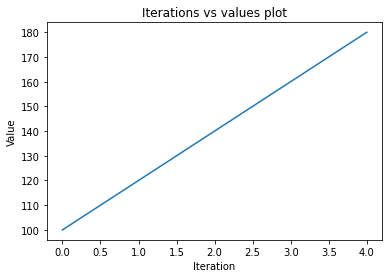

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

iters = np.arange(0, 5) #start=0, stop=5, and since no step is given, so default step=1
vals = np.arange(100, 200, 20) #start=100, stop=200, step=20

plt.plot(iters, vals)
plt.title("Iterations vs values plot")
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.show()

## Task 2
Generate a plot of **iteration vs relative approx error (%)** for the False Position method function you implemented earlier.

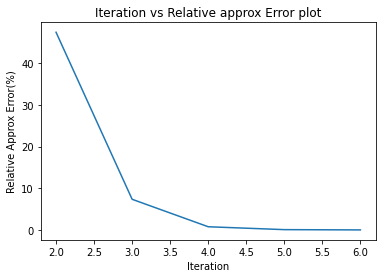

In [ ]:
# Write your code for generating the graph here
import numpy as np
import matplotlib.pyplot as plt

plt.plot(iterNum, errors)
plt.title("Iteration vs Relative approx Error plot")
plt.xlabel("Iteration")
plt.ylabel("Relative Approx Error(%)")
plt.show()


# **Secant method**
The Secant method is another method of finding roots of a nonlinear function. Unlike the Bisection and False position method, it falls under the category of **Open methods** due to the fact that we only need two initial guesses that do not have to bracket the actual root. Secant method works by approximating the derivative that is used in **Newton Raphson method**.

## Task 3
Implement the Secant method for the above function and write a script for testing its implementation. The actual root is -2.761, and you can take the initial guesses for the secant as 2 and 3.

In [ ]:
Xi = 2
Xi_prev = 3
epsilon = 0.01
f = [0.5,0,-2,5]
iterNum2=[]
errors2=[]
# Complete the following function
def secant(f, Xi, Xi_prev, epsilon):
  # write your implementation here
  root=Xi
  i=1
  while((func(f,Xi)-func(f,Xi_prev))!=0):
    iterNum2.append(i)
    X_new=Xi-(func(f,Xi)*(Xi-Xi_prev))/(func(f,Xi)-func(f,Xi_prev))
    error=abs((X_new-Xi)*100/X_new)

    errors2.append(error)
    print("Error : "+str(error))
    if(abs(error)<=epsilon):
      root=X_new
      break
    Xi=X_new
    print("Iteration No : "+str(i)+" Root : "+str(X_new))
    
    i=i+1
      
  return root  

# Write a script here for calling the above function
secant(f, Xi, Xi_prev, epsilon)

Streaming output truncated to the last 5000 lines.
Iteration No : 68343 Root : 1.2944049146581542
Error : 104.71890561561655
Iteration No : 68344 Root : 0.6322840143980397
Error : 248.34100789287007
Iteration No : 68345 Root : -0.42623683321247685
Error : 87.48343861196845
Iteration No : 68346 Root : -3.405382836375882
Error : 270.8766594437626
Iteration No : 68347 Root : -0.9181982067793761
Error : 81.97689519295257
Iteration No : 68348 Root : -5.0945617672951675
Error : 462.6838902293284
Iteration No : 68349 Root : 1.404683776848712
Error : 83.54662926217478
Iteration No : 68350 Root : 0.7653007753371959
Error : 545.0722825418679
Iteration No : 68351 Root : -0.17194977206094697
Error : 93.22678252998479
Iteration No : 68352 Root : -2.5386719505487942
Error : 28.07059328047241
Iteration No : 68353 Root : -3.5293937018662893
Error : 451.60796071066255
Iteration No : 68354 Root : -0.6398373397873383
Error : 84.63248455349519
Iteration No : 68355 Root : -4.163570500479716
Error : 1004.06

-2.7607628007280502

## Task 4
Plot the **iteration vs absolute relative approximate error (%)** curves for both False position method and Secant method in the same graph and see which one converges faster.

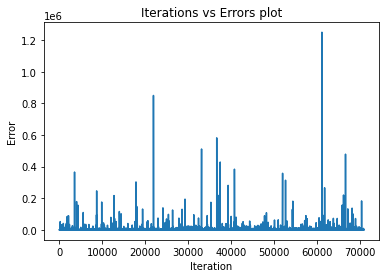

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(iterNum2, errors2)
plt.title("Iterations vs Errors plot")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()


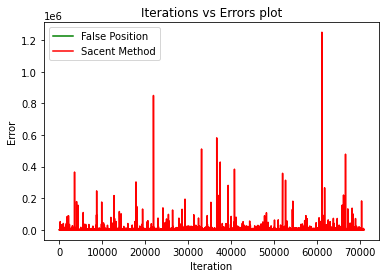

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(iterNum, errors,"green",label="False Position")
plt.plot(iterNum2, errors2,"red",label="Sacent Method")
plt.title("Iterations vs Errors plot")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.legend()
plt.show()